In [209]:
#Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 
import os

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.feature_selection import RFECV, SelectFromModel, SelectKBest
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
%matplotlib inline

In [210]:
#Load Dataset
stock = pd.read_csv('AAPL.csv')
df_stock = stock
df_stock = df_stock.rename(columns={'Close(t)':'Close'})
df_stock.head()

,Date,Open,High,Low,Close,Volume,SD20,Upper_Band,Lower_Band,S_Close(t-1),...,QQQ_MA10,QQQ_MA20,QQQ_MA50,SnP_Close,SnP(t-1)),SnP(t-5),DJIA_Close,DJIA(t-1)),DJIA(t-5),Close_forcast
0,2005-10-17,6.66,6.69,6.50,6.60,154208600,0.169237,6.827473,6.150527,6.67,...,33.692,33.9970,34.2690,1190.10,1186.57,1187.33,10348.10,10287.34,10238.76,6.45
1,2005-10-18,6.57,6.66,6.44,6.45,152397000,0.168339,6.819677,6.146323,6.60,...,33.570,33.9525,34.2466,1178.14,1190.10,1184.87,10285.26,10348.10,10253.17,6.78
2,2005-10-19,6.43,6.78,6.32,6.78,252170800,0.180306,6.861112,6.139888,6.45,...,33.562,33.9600,34.2330,1195.76,1178.14,1177.68,10414.13,10285.26,10216.91,6.93
3,2005-10-20,6.72,6.97,6.71,6.93,339440500,0.202674,6.931847,6.121153,6.78,...,33.567,33.9455,34.2190,1177.80,1195.76,1176.84,10281.10,10414.13,10216.59,6.87
4,2005-10-21,7.02,7.03,6.83,6.87,199181500,0.216680,6.974860,6.108140,6.93,...,33.586,33.9365,34.2034,1179.59,1177.80,1186.57,10215.22,10281.10,10287.34,7.01


In [187]:
df_stock.tail()

,Date,Open,High,Low,Close,Volume,SD20,Upper_Band,Lower_Band,S_Close(t-1),...,QQQ_MA10,QQQ_MA20,QQQ_MA50,SnP_Close,SnP(t-1)),SnP(t-5),DJIA_Close,DJIA(t-1)),DJIA(t-5),Close_forcast
3727,2020-08-07,452.82,454.70,441.17,444.45,49453300,27.954399,455.316298,343.498702,454.79,...,266.054,263.4085,252.2098,3351.28,3349.16,3271.12,27433.48,27386.98,26428.32,450.91
3728,2020-08-10,450.40,455.10,440.00,450.91,53100900,29.847338,462.586675,343.197325,444.45,...,267.073,263.9970,252.9570,3360.47,3351.28,3294.61,27791.44,27433.48,26664.40,437.50
3729,2020-08-11,447.88,449.93,436.43,437.50,46975600,30.576290,466.543079,344.237921,450.91,...,267.911,264.2380,253.5878,3333.69,3360.47,3306.51,27686.91,27791.44,26828.47,452.04
3730,2020-08-12,441.99,453.10,441.19,452.04,41486200,32.050532,472.583564,344.381436,437.50,...,269.120,264.7860,254.3206,3380.35,3333.69,3327.77,27976.84,27686.91,27201.52,460.04
3731,2020-08-13,457.72,464.17,455.71,460.04,52520500,33.532634,479.279768,345.149232,452.04,...,270.255,265.4540,255.0446,3373.43,3380.35,3349.16,27896.72,27976.84,27386.98,459.63


In [211]:
df_stock.shape

(3732, 64)

In [212]:
df_stock.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'SD20', 'Upper_Band',
       'Lower_Band', 'S_Close(t-1)', 'S_Close(t-2)', 'S_Close(t-3)',
       'S_Close(t-5)', 'S_Open(t-1)', 'MA5', 'MA10', 'MA20', 'MA50', 'MA200',
       'EMA10', 'EMA20', 'EMA50', 'EMA100', 'EMA200', 'MACD', 'MACD_EMA',
       'ATR', 'ADX', 'CCI', 'ROC', 'RSI', 'William%R', 'SO%K', 'STD5',
       'ForceIndex1', 'ForceIndex20', 'Date_col', 'Day', 'DayofWeek',
       'DayofYear', 'Week', 'Is_month_end', 'Is_month_start', 'Is_quarter_end',
       'Is_quarter_start', 'Is_year_end', 'Is_year_start', 'Is_leap_year',
       'Year', 'Month', 'QQQ_Close', 'QQQ(t-1)', 'QQQ(t-2)', 'QQQ(t-5)',
       'QQQ_MA10', 'QQQ_MA20', 'QQQ_MA50', 'SnP_Close', 'SnP(t-1))',
       'SnP(t-5)', 'DJIA_Close', 'DJIA(t-1))', 'DJIA(t-5)', 'Close_forcast'],
      dtype='object')

Plot Time Series chart for AAPL

In [190]:
#Convert "Date" column to datetime type if needed
df_stock['Date'] = pd.to_datetime(df_stock['Date'])

# Set "Date" column as the index
df_stock.set_index('Date', inplace=True)

In [191]:
df_stock.index

DatetimeIndex(['2005-10-17', '2005-10-18', '2005-10-19', '2005-10-20',
               '2005-10-21', '2005-10-24', '2005-10-25', '2005-10-26',
               '2005-10-27', '2005-10-28',
               ...
               '2020-07-31', '2020-08-03', '2020-08-04', '2020-08-05',
               '2020-08-06', '2020-08-07', '2020-08-10', '2020-08-11',
               '2020-08-12', '2020-08-13'],
              dtype='datetime64[ns]', name='Date', length=3732, freq=None)

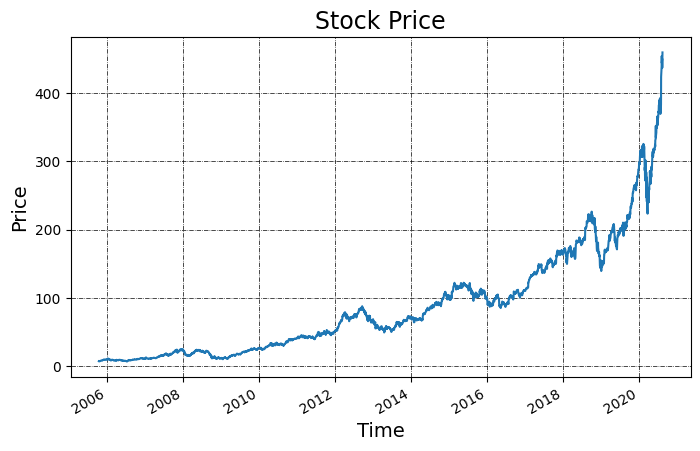

In [192]:
df_stock['Close'].plot(figsize=(8, 5))
plt.title("Stock Price", fontsize=17)
plt.ylabel('Price', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.show()

Remove some of the columns which are not required

In [193]:
df_stock.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3732 entries, 2005-10-17 to 2020-08-13
Data columns (total 63 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Open              3732 non-null   float64
 1   High              3732 non-null   float64
 2   Low               3732 non-null   float64
 3   Close             3732 non-null   float64
 4   Volume            3732 non-null   int64  
 5   SD20              3732 non-null   float64
 6   Upper_Band        3732 non-null   float64
 7   Lower_Band        3732 non-null   float64
 8   S_Close(t-1)      3732 non-null   float64
 9   S_Close(t-2)      3732 non-null   float64
 10  S_Close(t-3)      3732 non-null   float64
 11  S_Close(t-5)      3732 non-null   float64
 12  S_Open(t-1)       3732 non-null   float64
 13  MA5               3732 non-null   float64
 14  MA10              3732 non-null   float64
 15  MA20              3732 non-null   float64
 16  MA50              3732 n

In [194]:
df_stock.index

DatetimeIndex(['2005-10-17', '2005-10-18', '2005-10-19', '2005-10-20',
               '2005-10-21', '2005-10-24', '2005-10-25', '2005-10-26',
               '2005-10-27', '2005-10-28',
               ...
               '2020-07-31', '2020-08-03', '2020-08-04', '2020-08-05',
               '2020-08-06', '2020-08-07', '2020-08-10', '2020-08-11',
               '2020-08-12', '2020-08-13'],
              dtype='datetime64[ns]', name='Date', length=3732, freq=None)

In [195]:
#df_stock = df_stock.drop(columns='Date_col')

Test Train Set

In [196]:
def create_train_test_set(df_stock):
    
    features = df_stock.drop(columns=['Close_forcast'], axis=1)
    features.drop(columns='Date_col',inplace = True)
    target = df_stock['Close_forcast']
    

    data_len = df_stock.shape[0]
    print('Historical Stock Data length is - ', str(data_len))

    #create a chronological split for train and testing
    train_split = int(data_len * 0.88)
    print('Training Set length - ', str(train_split))

    val_split = train_split + int(data_len * 0.1)
    print('Validation Set length - ', str(int(data_len * 0.1)))

    print('Test Set length - ', str(int(data_len * 0.02)))

    # Splitting features and target into train, validation and test samples 
    X_train, X_val, X_test = features[:train_split], features[train_split:val_split], features[val_split:]
    Y_train, Y_val, Y_test = target[:train_split], target[train_split:val_split], target[val_split:]

    #print shape of samples
    print(X_train.shape, X_val.shape, X_test.shape)
    print(Y_train.shape, Y_val.shape, Y_test.shape)
    
    
    return X_train, X_val, X_test, Y_train, Y_val, Y_test

In [197]:
X_train, X_val, X_test, Y_train, Y_val, Y_test = create_train_test_set(df_stock)

Historical Stock Data length is -  3732
Training Set length -  3284
Validation Set length -  373
Test Set length -  74
(3284, 61) (373, 61) (75, 61)
(3284,) (373,) (75,)


Prediction using Linear Regression

In [198]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, Y_train)

LinearRegression()

In [199]:
print('LR Coefficients: \n', lr.coef_)
print('LR Intercept: \n', lr.intercept_)

LR Coefficients: 
 [ 8.63720205e-03  1.86051900e-01  1.55487071e-01  1.12263757e+00
  1.27286701e-10  6.75244734e-03  1.40229154e-01  1.13219364e-01
  4.25627890e-02  8.96348531e-02  1.01914956e-01  5.94183565e-02
  7.95194243e-02  7.10400091e-02  2.71425008e-01  1.26724259e-01
  8.79333174e-02 -5.87980413e-03 -3.31643401e-01 -3.31643401e-01
 -3.31643401e-01 -3.31643401e-01 -3.31643401e-01  1.88650003e+00
 -1.27270716e+00 -1.65042232e-01 -4.36658031e-04 -3.20094472e-12
 -5.07434336e-03  9.02936419e-03  5.78317156e-04  5.78317153e-04
 -5.57917754e-01 -2.02304395e-10  4.18930446e-11  1.69322438e-02
  1.61636704e-02 -1.75659582e-02  6.12165520e-03  2.15420350e-01
  1.13979656e-01 -2.41954674e-01  7.63050306e-02  3.73276598e-01
 -1.16573418e-15 -5.60843988e-02  4.08788805e-02  5.13473863e-01
 -2.94431539e-02 -8.41335081e-02  5.10939135e-02 -8.14435712e-03
 -1.95035196e-02  5.67587251e-02  4.39707788e-02  1.29311738e-02
 -9.99967544e-03 -3.89778363e-03 -1.62174814e-03  1.44436900e-03
  2.83

Evaluation

In [200]:
print("Performance (R^2): ", lr.score(X_train, Y_train))

Performance (R^2):  0.9994516474373267


In [201]:
def get_mape(y_true, y_pred): 
    """
    Compute mean absolute percentage error (MAPE)
    """
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

Predict for the test dataset

In [202]:
Y_train_pred = lr.predict(X_train)
Y_val_pred = lr.predict(X_val)
Y_test_pred = lr.predict(X_test)

In [203]:
print("Training R-squared: ", round(metrics.r2_score(Y_train,Y_train_pred),2))
print("Training Explained Variation: ",round(metrics.explained_variance_score(Y_train,Y_train_pred),2))
print('Training MAPE:', round(get_mape(Y_train,Y_train_pred), 2)) 
print('Training Mean Squared Error:', round(metrics.mean_squared_error(Y_train,Y_train_pred), 2)) 
print("Training RMSE: ",round(np.sqrt(metrics.mean_squared_error(Y_train,Y_train_pred)),2))
print("Training MAE: ",round(metrics.mean_absolute_error(Y_train,Y_train_pred),2))

print(' ')

print("Validation R-squared: ",round(metrics.r2_score(Y_val,Y_val_pred),2))
print("Validation Explained Variation: ",round(metrics.explained_variance_score(Y_val,Y_val_pred),2))
print('Validation MAPE:', round(get_mape(Y_val,Y_val_pred), 2)) 
print('Validation Mean Squared Error:', round(metrics.mean_squared_error(Y_train,Y_train_pred), 2)) 
print("Validation RMSE: ",round(np.sqrt(metrics.mean_squared_error(Y_val,Y_val_pred)),2))
print("Validation MAE: ",round(metrics.mean_absolute_error(Y_val,Y_val_pred),2))

print(' ')

print("Test R-squared: ",round(metrics.r2_score(Y_test,Y_test_pred),2))
print("Test Explained Variation: ",round(metrics.explained_variance_score(Y_test,Y_test_pred),2))
print('Test MAPE:', round(get_mape(Y_test,Y_test_pred), 2)) 
print('Test Mean Squared Error:', round(metrics.mean_squared_error(Y_test,Y_test_pred), 2)) 
print("Test RMSE: ",round(np.sqrt(metrics.mean_squared_error(Y_test,Y_test_pred)),2))
print("Test MAE: ",round(metrics.mean_absolute_error(Y_test,Y_test_pred),2))

Training R-squared:  1.0
Training Explained Variation:  1.0
Training MAPE: 1.45
Training Mean Squared Error: 1.48
Training RMSE:  1.22
Training MAE:  0.76
 
Validation R-squared:  0.99
Validation Explained Variation:  0.99
Validation MAPE: 1.68
Validation Mean Squared Error: 1.48
Validation RMSE:  5.91
Validation MAE:  3.75
 
Test R-squared:  0.96
Test Explained Variation:  0.97
Test MAPE: 1.77
Test Mean Squared Error: 79.21
Test RMSE:  8.9
Test MAE:  6.5


In [204]:
df_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Actual     373 non-null    float64       
 1   Predicted  373 non-null    float64       
 2   Date       373 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(2)
memory usage: 8.9 KB


In [205]:
print(list(Y_val.values))

[202.3, 196.56, 198.68, 204.71, 204.0, 200.06, 189.99, 188.09, 182.77, 187.28, 189.36, 181.85, 173.17, 172.97, 168.58, 170.86, 170.48, 177.04, 175.68, 174.73, 180.84, 172.88, 170.95, 164.86, 165.94, 165.0, 165.46, 167.27, 161.91, 160.41, 162.49, 157.42, 153.45, 147.48, 143.67, 153.78, 152.78, 152.86, 154.34, 154.52, 139.13, 145.06, 144.74, 147.5, 150.01, 150.49, 149.01, 146.77, 149.77, 151.6, 152.5, 153.44, 150.0, 150.6, 149.41, 154.36, 152.93, 151.35, 161.69, 162.85, 162.93, 167.56, 170.43, 170.48, 167.26, 167.45, 166.49, 167.92, 167.23, 167.84, 167.46, 167.96, 169.04, 168.09, 169.97, 171.21, 171.3, 171.83, 170.14, 171.93, 172.8, 172.48, 171.49, 169.51, 169.91, 175.79, 177.77, 178.56, 180.54, 182.89, 184.76, 183.29, 184.89, 191.7, 187.73, 185.46, 183.55, 185.2, 185.44, 186.65, 187.92, 190.65, 191.96, 192.29, 193.58, 196.63, 196.04, 197.14, 195.5, 195.42, 195.77, 195.79, 199.6, 200.32, 200.98, 203.88, 203.56, 201.72, 200.75, 201.06, 197.19, 206.87, 205.52, 208.07, 204.86, 199.34, 199.3

In [206]:
df_pred = pd.DataFrame(Y_val.values, columns=['Actual'], index=Y_val.index)
df_pred['Predicted'] = Y_val_pred
df_pred

,Actual,Predicted
3284,202.30,216.289778
3285,196.56,201.470182
3286,198.68,195.948933
3287,204.71,199.043602
3288,204.00,204.193666
...,...,...
3652,273.79,275.751755
3653,281.70,274.020243
3654,281.90,280.710044
3655,277.33,280.543603


In [207]:
df_pred.loc[:, 'Date'] = pd.to_datetime(df_Stock['Date'],format='%Y-%m-%d')
df_pred = df_pred.reset_index()
df_pred.drop(columns='index',inplace = True)
df_pred

,Actual,Predicted,Date
0,202.30,216.289778,2018-11-01
1,196.56,201.470182,2018-11-02
2,198.68,195.948933,2018-11-05
3,204.71,199.043602,2018-11-06
4,204.00,204.193666,2018-11-07
...,...,...,...
368,273.79,275.751755,2020-04-22
369,281.70,274.020243,2020-04-23
370,281.90,280.710044,2020-04-24
371,277.33,280.543603,2020-04-27


<Axes: >

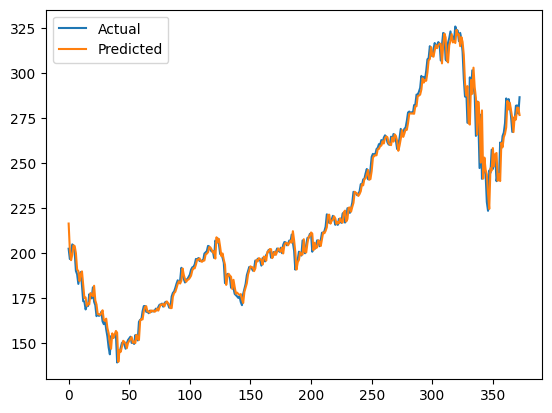

In [208]:
df_pred[['Actual', 'Predicted']].plot()